In [1]:
import pandas as pd
import numpy as np
from darts import TimeSeries
import calendar
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta, LinearRegressionModel
from darts.metrics import mae, mape
from darts.utils.statistics import extract_trend_and_seasonality
from darts.utils.utils import ModelMode
from darts.utils.utils import SeasonalityMode
import plotly.express as px

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('../better_sheff_merge.csv')

In [3]:
x = data['x'].to_list()
y = data['y'].to_list()
z = data['z'].to_list()

In [4]:
# z = np.array(z).reshape(int(3446/2),int(527*2))

In [5]:
df = pd.read_csv('../../clean_data/clean_sheff_data.csv')

In [6]:
df_agg = df.groupby(by ='yyyy', as_index = False).agg({'avgtemp(degC)': 'mean',
                                                        'sun(hours)': 'mean',
                                                        'rain(mm)': 'sum',
                                                        'af(days)': 'sum',
                                                        'tmin(degC)': 'mean',
                                                        'tmax(degC)': 'mean'}
                                                       )

In [7]:
series_avg_ann = TimeSeries.from_dataframe(df_agg, "yyyy", "avgtemp(degC)")
train_avg_ann, val_avg_ann = series_avg_ann[:-1], series_avg_ann[-1:]
model_avg_ann = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=SeasonalityMode.NONE)
model_avg_ann.fit(train_avg_ann)
prediction_avg_ann = model_avg_ann.predict(200, num_samples=1000)

In [8]:
avg_list = []
for i in range(0,200):
    avg_list.append(prediction_avg_ann[i].mean()[0].first_value()) 
len(avg_list)

200

In [9]:
yyyy = list(range(2019,2219,1))

In [10]:
df_new = pd.DataFrame()

In [11]:
df_new['yyyy'] = yyyy

In [12]:
df_new['avgtemp(degC)'] = avg_list

In [13]:
df_new['x'] = [x]*200
df_new['y'] = [y]*200
df_new['z'] = [z]*200

In [14]:
lst=[]
for idx, row in df_new.iterrows():
    lst.append(df_new.iloc[idx]["avgtemp(degC)"] - (0.98*np.array(row["z"])/100))
lst

[array([8.91459849, 8.89499849, 8.90479849, ..., 8.90479849, 8.90479849,
        8.90479849]),
 array([8.95571902, 8.93611902, 8.94591902, ..., 8.94591902, 8.94591902,
        8.94591902]),
 array([8.93514704, 8.91554704, 8.92534704, ..., 8.92534704, 8.92534704,
        8.92534704]),
 array([8.96173749, 8.94213749, 8.95193749, ..., 8.95193749, 8.95193749,
        8.95193749]),
 array([8.99841419, 8.97881419, 8.98861419, ..., 8.98861419, 8.98861419,
        8.98861419]),
 array([8.98819147, 8.96859147, 8.97839147, ..., 8.97839147, 8.97839147,
        8.97839147]),
 array([9.01808552, 8.99848552, 9.00828552, ..., 9.00828552, 9.00828552,
        9.00828552]),
 array([9.00764259, 8.98804259, 8.99784259, ..., 8.99784259, 8.99784259,
        8.99784259]),
 array([9.00726817, 8.98766817, 8.99746817, ..., 8.99746817, 8.99746817,
        8.99746817]),
 array([9.03117969, 9.01157969, 9.02137969, ..., 9.02137969, 9.02137969,
        9.02137969]),
 array([9.0838536, 9.0642536, 9.0740536, ..., 9.07

In [15]:
df_new["temp_alt"] = lst

In [16]:
df_new

,yyyy,avgtemp(degC),x,y,z,temp_alt
0,2019,10.590398,"[-184878.203, -184836.846, -184795.49, -184754...","[7089520.381, 7089520.381, 7089520.381, 708952...","[171, 173, 172, 166, 164, 162, 161, 160, 160, ...","[8.914598486411926, 8.894998486411927, 8.90479..."
1,2020,10.631519,"[-184878.203, -184836.846, -184795.49, -184754...","[7089520.381, 7089520.381, 7089520.381, 708952...","[171, 173, 172, 166, 164, 162, 161, 160, 160, ...","[8.955719015097632, 8.936119015097633, 8.94591..."
2,2021,10.610947,"[-184878.203, -184836.846, -184795.49, -184754...","[7089520.381, 7089520.381, 7089520.381, 708952...","[171, 173, 172, 166, 164, 162, 161, 160, 160, ...","[8.935147040693245, 8.915547040693246, 8.92534..."
3,2022,10.637537,"[-184878.203, -184836.846, -184795.49, -184754...","[7089520.381, 7089520.381, 7089520.381, 708952...","[171, 173, 172, 166, 164, 162, 161, 160, 160, ...","[8.961737486020255, 8.942137486020254, 8.95193..."
4,2023,10.674214,"[-184878.203, -184836.846, -184795.49, -184754...","[7089520.381, 7089520.381, 7089520.381, 708952...","[171, 173, 172, 166, 164, 162, 161, 160, 160, ...","[8.998414193519949, 8.978814193519948, 8.98861..."
...,...,...,...,...,...,...
195,2214,13.166889,"[-184878.203, -184836.846, -184795.49, -184754...","[7089520.381, 7089520.381, 7089520.381, 708952...","[171, 173, 172, 166, 164, 162, 161, 160, 160, ...","[11.49108884020066, 11.471488840200662, 11.481..."
196,2215,13.184663,"[-184878.203, -184836.846, -184795.49, -184754...","[7089520.381, 7089520.381, 7089520.381, 708952...","[171, 173, 172, 166, 164, 162, 161, 160, 160, ...","[11.50886282867118, 11.489262828671182, 11.499..."
197,2216,13.208745,"[-184878.203, -184836.846, -184795.49, -184754...","[7089520.381, 7089520.381, 7089520.381, 708952...","[171, 173, 172, 166, 164, 162, 161, 160, 160, ...","[11.532945449566704, 11.513345449566705, 11.52..."
198,2217,13.212936,"[-184878.203, -184836.846, -184795.49, -184754...","[7089520.381, 7089520.381, 7089520.381, 708952...","[171, 173, 172, 166, 164, 162, 161, 160, 160, ...","[11.537135982711607, 11.517535982711607, 11.52..."


In [17]:
first = pd.DataFrame(df_new[['x','y','temp_alt']].iloc[0])

In [18]:
first

,0
x,"[-184878.203, -184836.846, -184795.49, -184754..."
y,"[7089520.381, 7089520.381, 7089520.381, 708952..."
temp_alt,"[8.914598486411926, 8.894998486411927, 8.90479..."


In [19]:
first_layer = pd.DataFrame(first[0].tolist(), index= first.index).T

In [20]:
first_layer.columns = first_layer.iloc[0]
first_layer = first_layer[1:]

In [21]:
first_layer

,-1.848782e+05,7.089520e+06,8.914598e+00
1,-184836.846,7089520.381,8.894998
2,-184795.490,7089520.381,8.904798
3,-184754.133,7089520.381,8.963598
4,-184712.777,7089520.381,8.983198
5,-184671.421,7089520.381,9.002798
...,...,...,...
1816037,-141495.286,7018334.906,8.894998
1816038,-141453.929,7018334.906,8.904798
1816039,-141412.573,7018334.906,8.904798
1816040,-141371.216,7018334.906,8.904798


In [22]:
first_layer.to_csv('first_layer.csv',index=False)

In [23]:
1816041/1723

1053.999419616947

In [24]:
df_new["temp_alt"].iloc[0].reshape(1723,1054).min()

5.807998486411926

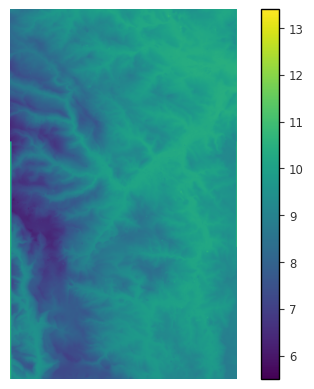

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.gca()
plt.imshow(df_new["temp_alt"].iloc[0].reshape(1723,1054))
plt.clim(5.5,13.4)
plt.colorbar()
plt.grid(False)
ax.xaxis.set_visible(False);
ax.yaxis.set_visible(False);
plt.savefig('test.png')

In [18]:
len(df_new)

200